/Users/rit/Src/bullshead/notebooks


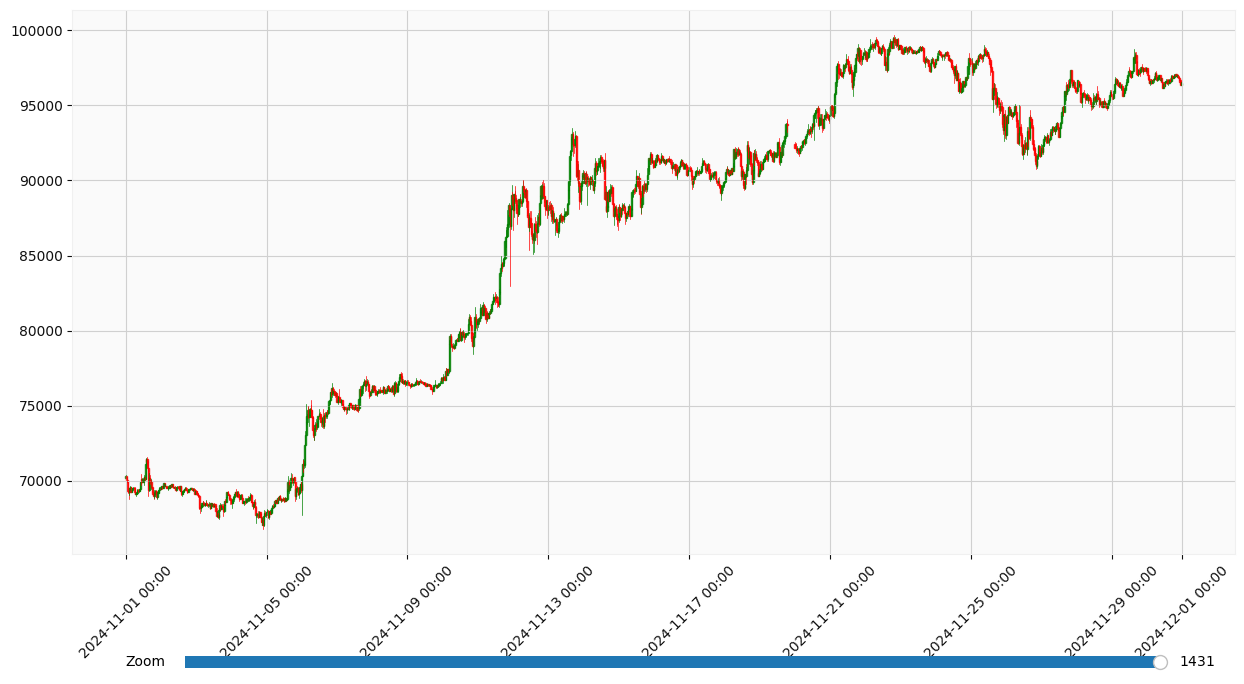

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import os

print(os.getcwd())

# Check if file exists
file_path = '../scraper/binance_data_merged/klines/30m/merged.csv'
if not os.path.exists(file_path):
    raise FileNotFoundError(f"CSV file not found at path: {file_path}")

# Read the CSV data
df = pd.read_csv(file_path)

# Preprocess Data
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
df['date_num'] = mdates.date2num(df['open_time'])  # Convert to matplotlib date format

# Select required columns for candlestick chart
data = df[['date_num', 'open', 'high', 'low', 'close', 'volume']].copy()

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
plt.subplots_adjust(bottom=0.2)  # Leave space for the slider

# Plot initial candlestick chart
candlestick_ohlc(ax, data.values, width=0.03, colorup='g', colordown='r', alpha=0.8)
ax.xaxis_date()  # Format the x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)
plt.grid(True)

# Add slider for zooming
ax_slider = plt.axes([0.2, 0.05, 0.65, 0.03])  # Position the slider
slider = Slider(ax_slider, 'Zoom', 1, len(data), valinit=len(data), valstep=1)

# Function to update the chart when the slider value changes
def update(val):
    zoom_level = int(slider.val)
    start_index = max(0, len(data) - zoom_level)  # Adjust start index based on zoom level
    visible_data = data.iloc[start_index:]  # Slice the data

    # Clear the axis and re-plot
    ax.clear()
    candlestick_ohlc(ax, visible_data.values, width=0.03, colorup='g', colordown='r', alpha=0.8)
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.xticks(rotation=45)
    plt.grid(True)
    fig.canvas.draw_idle()  # Redraw the canvas

slider.on_changed(update)  # Link the slider to the update function

plt.show()
